In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns_m = inspector.get_columns('measurement')
for column in columns_m:
    print(column["name"], column["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute(text('SELECT * from measurement limit 5')).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set. - '2017-08-23',
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()   ##sess.query(measurement.date) equivalent to "Select date from measurements"
recent_date[0]


'2017-08-23'

In [15]:

import datetime as dt
latest_date = print(dt.date(2017,8,23))
latest_date



2017-08-23


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(recent_date)

# Calculate the date one year from the last date in data set.
one_year_back = print(dt.date(2017,8,23) - dt.timedelta(days= 365))

one_year_back_date=dt.datetime(2016, 8, 22)

# # Perform a query to retrieve the data and precipitation scores
one_year_data =  session.query(measurement.date, measurement.prcp).filter(measurement.date > one_year_back_date).all()  ## this returned a list of tuples from Select date and prcp columns from 
#measurement tables which is greater than a particular date ( eg > 1.1.2023)

print(one_year_data)
#result : [('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13)]


#now creating a list of dictinaries from the list of tuples above
data_list = []
for data in one_year_data:
    data_dict = {}
    data_dict["Date"] = data[0]
    data_dict["PRCP"] = data[1]
    data_list.append(data_dict)

data_list
#result:
#[{'Date': '2016-08-24', 'PRCP': 0.08},
#  {'Date': '2016-08-25', 'PRCP': 0.08},
#  {'Date': '2016-08-26', 'PRCP': 0.0},
#  {'Date': '2016-08-27', 'PRCP': 0.0}]




# # Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(data_list)

data_df.rename(columns = {'Date': 'DATES'}, inplace = True)
data_df.rename(columns = {'PRCP': 'Precipitation'}, inplace = True)
# Sort the dataframe by date
data_df = data_df.sort_values(by = 'DATES')
data_df.set_index('DATES', inplace=True)
data_df.head()




('2017-08-23',)
2016-08-23
[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10

,Precipitation
DATES,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


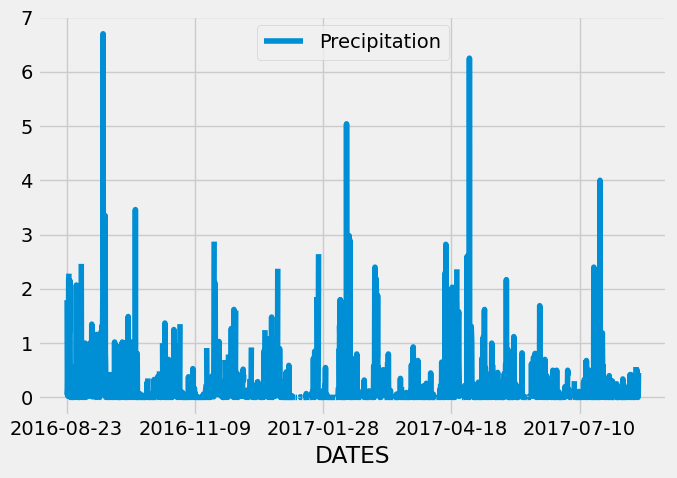

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data


data_df.plot(figsize=(7,5))
plt.tight_layout()

In [18]:
data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.station)).distinct().all()
print(station_count)

[(9,)]


In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281_stats= session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()
print(USC00519281_stats)

[(54.0, 85.0, 71.66378066378067)]


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data_year = session.query(measurement.tobs).filter(measurement.date > one_year_back_date, measurement.station == "USC00519281" ).all()
print(station_data_year)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [24]:
station_temp_df = pd.DataFrame(station_data_year, columns=['Tabs'])
station_temp_df.head()

,Tabs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


Text(0, 0.5, 'frequency')

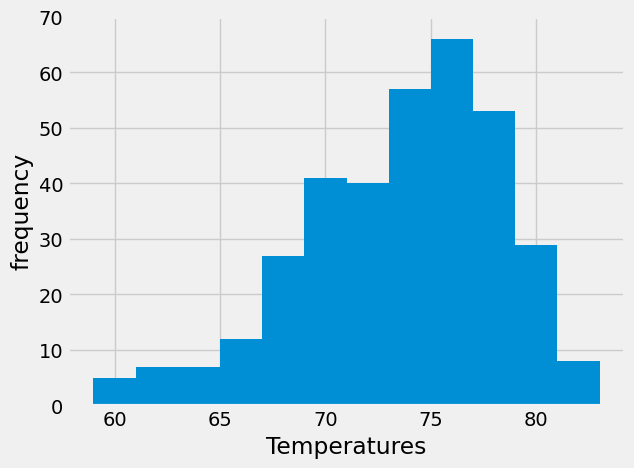

In [25]:
bins = 12
plt.hist(station_temp_df,bins, label="Tobs")
plt.ylim(0,70)
plt.xlabel("Temperatures")
plt.ylabel("frequency")


In [29]:
#Testing Code

active_station = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
# active_station
most_active_station = active_station[0]
print(most_active_station[0])
most_active_station_temp = session.query(measurement.date, measurement.tobs).filter(measurement.date > one_year_back_date, measurement.station ==most_active_station[0]).all()
most_active_station_temp

data_list = []
for data in most_active_station_temp:
    data_dict = {}
    data_dict["DATE "] = data[0]
    data_dict["Temperature "] = data[1]
    data_list.append(data_dict)

data_list

# USC00519281_temp = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016,8,23').all()
# USC00519281_temp

USC00519281


[{'DATE ': '2016-08-23', 'Temperature ': 77.0},
 {'DATE ': '2016-08-24', 'Temperature ': 77.0},
 {'DATE ': '2016-08-25', 'Temperature ': 80.0},
 {'DATE ': '2016-08-26', 'Temperature ': 80.0},
 {'DATE ': '2016-08-27', 'Temperature ': 75.0},
 {'DATE ': '2016-08-28', 'Temperature ': 73.0},
 {'DATE ': '2016-08-29', 'Temperature ': 78.0},
 {'DATE ': '2016-08-30', 'Temperature ': 77.0},
 {'DATE ': '2016-08-31', 'Temperature ': 78.0},
 {'DATE ': '2016-09-01', 'Temperature ': 80.0},
 {'DATE ': '2016-09-02', 'Temperature ': 80.0},
 {'DATE ': '2016-09-03', 'Temperature ': 78.0},
 {'DATE ': '2016-09-04', 'Temperature ': 78.0},
 {'DATE ': '2016-09-05', 'Temperature ': 78.0},
 {'DATE ': '2016-09-06', 'Temperature ': 73.0},
 {'DATE ': '2016-09-07', 'Temperature ': 74.0},
 {'DATE ': '2016-09-08', 'Temperature ': 80.0},
 {'DATE ': '2016-09-09', 'Temperature ': 79.0},
 {'DATE ': '2016-09-10', 'Temperature ': 77.0},
 {'DATE ': '2016-09-11', 'Temperature ': 80.0},
 {'DATE ': '2016-09-12', 'Temperature ':

# Close Session

In [27]:
# Close Session
session.close()

In [28]:
# station_list = session.query(station.station, station.name).all()


# # now creating a list of dictinaries from the list
# data_list = []
# for data in station_list:
#     data_dict = {}
#     data_dict["Station NO "] = data[0]
#     data_dict["Station Name"] = data[1]
#     data_list.append(data_dict)
# data_list